In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st
import seaborn as sns
plt.style.use("seaborn")

C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\2235473517.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [23]:
filepath = "BankChurners.csv"
df = pd.read_csv(filepath)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [24]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [34]:
#CLEANING THE DATA 

#dropping irrelevant columns:
reduced_data = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
                             ,'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                                ,'Avg_Open_To_Buy'
                   ])

#renaming columns:
reduced_data = reduced_data.rename(columns={"Total_Relationship_Count": "Number of Products Customers Holds"
                                               ,'Contacts_Count_12_mon': "Number of Contacts in the last 12 mths"    
                                            ,"Dependent_count": "Number of Dependents"
                                            ,"Months_Inactive_12_mon": "Number of Months Inactive in the Last 12 Months"
                                            ,'Total_Revolving_Bal' : "Total Revolving Balance"
                                            ,"Customer_Age": "Customer Age"
                                            ,"CLIENTNUM" : "Client ID"
                                            , "Attrition_Flag" : "Attrition Flag"
                                            ,"Education_Level": "Education Level"
                                            ,"Marital_Status": "Marital Status"
                                            ,"Income_Category": "Income Category"
                                            ,"Months_on_book" : "Months on the Book"
                                            ,"Credit_Limit" : "Credit Limit"
                                            ,"Total_Amt_Chng_Q4_Q1" : "Total Amount Change (Q4/Q1)"
                                            , "Total_Trans_Amt" : "Total Transaction Amt (Last 12 mths)"
                                            , "Total_Trans_Ct" : "Total Transaction Count"
                                            , "Total_Ct_Chng_Q4_Q1" : " Total Count Change (Q4/Q1)"
                                            ,"Avg_Utilization_ Ratio" : "Average Utilization Ratio"
                                            ,"Card_Category" : "Card Category"
                                              })
reduced_data.sample(5)


,Client ID,Attrition Flag,Customer Age,Gender,Number of Dependents,Education Level,Marital Status,Income Category,Card Category,Months on the Book,Number of Products Customers Holds,Number of Months Inactive in the Last 12 Months,Number of Contacts in the last 12 mths,Credit Limit,Total Revolving Balance,Total Amount Change (Q4/Q1),Total Transaction Amt (Last 12 mths),Total Transaction Count,Total Count Change (Q4/Q1),Avg_Utilization_Ratio
4797,709627983,Existing Customer,56,F,3,Post-Graduate,Single,Less than $40K,Blue,36,4,3,0,2535.0,1699,0.720,4497,68,0.789,0.670
4819,713264583,Existing Customer,43,M,2,High School,Married,$120K +,Silver,23,3,3,2,34516.0,1153,0.890,4486,71,0.690,0.033
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,0.660,15577,114,0.754,0.151
1118,718264233,Existing Customer,29,M,0,High School,Married,$40K - $60K,Blue,13,4,1,4,1458.0,671,1.583,2449,56,0.931,0.460
9399,713550483,Existing Customer,45,M,4,Graduate,Unknown,$60K - $80K,Blue,33,1,5,1,8670.0,1930,0.933,13767,96,0.655,0.223


In [46]:
reduced_data.sample(5)
#reduced_data.columns

,Client ID,Attrition Flag,Customer Age,Gender,Number of Dependents,Education Level,Marital Status,Income Category,Card Category,Months on the Book,Number of Products Customers Holds,Number of Months Inactive in the Last 12 Months,Number of Contacts in the last 12 mths,Credit Limit,Total Revolving Balance,Total Amount Change (Q4/Q1),Total Transaction Amt (Last 12 mths),Total Transaction Count,Total Count Change (Q4/Q1),Avg_Utilization_Ratio
2763,717411483,Existing Customer,55,M,4,College,Divorced,$80K - $120K,Blue,36,4,2,3,34173.0,1194,1.056,3731,69,0.816,0.035
4246,711626658,Attrited Customer,62,F,1,High School,Single,Less than $40K,Blue,36,2,3,4,1930.0,0,0.331,1971,45,0.250,0.000
923,713008308,Existing Customer,59,F,0,Unknown,Married,Less than $40K,Blue,47,5,3,2,7692.0,1678,1.423,1861,42,0.500,0.218
7206,720180633,Existing Customer,50,M,2,College,Married,$120K +,Blue,36,3,2,3,3390.0,2385,0.656,4128,73,0.698,0.704
6751,719362458,Existing Customer,47,F,3,High School,Married,Less than $40K,Blue,36,5,3,3,2822.0,0,0.681,5064,74,0.850,0.000


['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


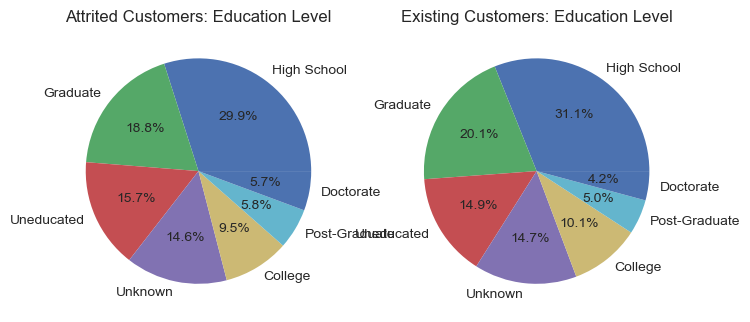

In [88]:
labels = reduced_data["Education Level"].unique()

fig, (ax1, ax2) = plt.subplots(1,2) # 1 row, 2 columns 
#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_education_level = attrited_df["Education Level"].value_counts()
ax1.pie(attrited_education_level, labels = labels, autopct='%1.1f%%' )
ax1.set_title("Attrited Customers: Education Level")
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_education_level = existing_df["Education Level"].value_counts()
ax2.pie(existing_education_level, labels = labels, autopct='%1.1f%%')
ax2.set_title("Existing Customers: Education Level")

plt.show()



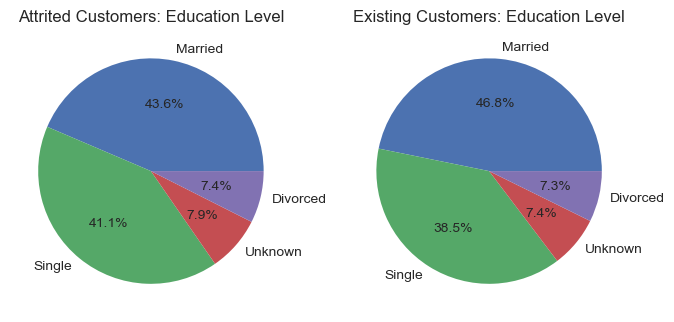

In [89]:
#Marital Status 

labels = reduced_data["Marital Status"].unique()

fig, (ax1, ax2) = plt.subplots(1,2) # 1 row, 2 columns 
#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_marital_status = attrited_df["Marital Status"].value_counts()
ax1.pie(attrited_marital_status, labels = labels, autopct='%1.1f%%' )
ax1.set_title("Attrited Customers: Education Level")
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_marital_status = existing_df["Marital Status"].value_counts()
ax2.pie(existing_marital_status, labels = labels, autopct='%1.1f%%')
ax2.set_title("Existing Customers: Education Level")

plt.show()


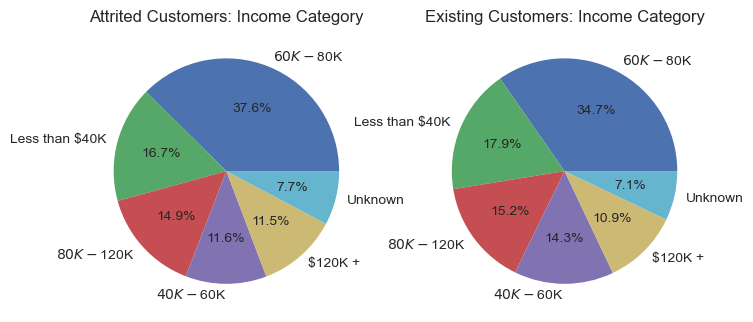

In [91]:
#Income Category 

labels = reduced_data["Income Category"].unique()

fig, (ax1, ax2) = plt.subplots(1,2) # 1 row, 2 columns 
#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_income_category = attrited_df["Income Category"].value_counts()
ax1.pie(attrited_income_category, labels = labels, autopct='%1.1f%%' )
ax1.set_title("Attrited Customers: Income Category")
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_income_category = existing_df["Income Category"].value_counts()
ax2.pie(existing_income_category, labels = labels, autopct='%1.1f%%')
ax2.set_title("Existing Customers: Income Category")

plt.show()

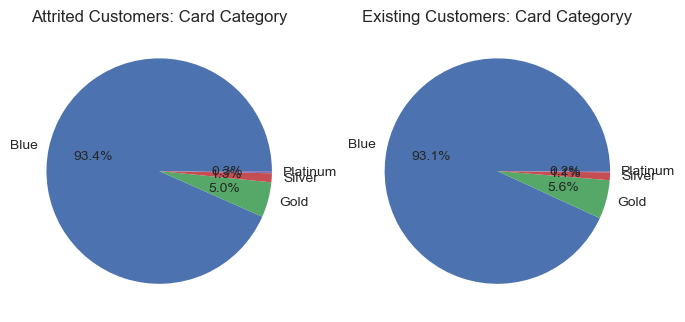

In [92]:
#Card Category 

labels = reduced_data["Card Category"].unique()

fig, (ax1, ax2) = plt.subplots(1,2) # 1 row, 2 columns 
#  attrited customers 
attrited_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Attrited Customer"]
attrited_card_category = attrited_df["Card Category"].value_counts()
ax1.pie(attrited_card_category, labels = labels, autopct='%1.1f%%' )
ax1.set_title("Attrited Customers: Card Category")
#existing customers 

existing_df = reduced_data.loc[reduced_data["Attrition Flag"] == "Existing Customer"]
existing_card_category = existing_df["Card Category"].value_counts()
ax2.pie(existing_card_category, labels = labels, autopct='%1.1f%%')
ax2.set_title("Existing Customers: Card Categoryy")

plt.show()

In [94]:
reduced_data.sample(10)

,Client ID,Attrition Flag,Customer Age,Gender,Number of Dependents,Education Level,Marital Status,Income Category,Card Category,Months on the Book,Number of Products Customers Holds,Number of Months Inactive in the Last 12 Months,Number of Contacts in the last 12 mths,Credit Limit,Total Revolving Balance,Total Amount Change (Q4/Q1),Total Transaction Amt (Last 12 mths),Total Transaction Count,Total Count Change (Q4/Q1),Avg_Utilization_Ratio
668,718888308,Existing Customer,53,M,3,Graduate,Single,$80K - $120K,Blue,36,4,3,2,34516.0,2517,0.741,1475,33,0.833,0.073
589,709186983,Existing Customer,49,M,4,Uneducated,Married,$80K - $120K,Blue,40,3,1,1,8714.0,2252,0.831,1536,38,0.652,0.258
2502,816325533,Existing Customer,39,F,1,Graduate,Married,Less than $40K,Blue,34,6,3,5,6458.0,1802,0.923,2315,49,0.581,0.279
4296,750147483,Existing Customer,49,M,2,High School,Single,$80K - $120K,Blue,37,6,1,4,24299.0,2517,0.723,5320,62,0.771,0.104
4970,714400308,Existing Customer,60,F,0,Uneducated,Single,Less than $40K,Silver,49,3,1,1,11060.0,1647,0.938,4545,83,0.766,0.149
8191,751143858,Existing Customer,59,F,1,High School,Single,Unknown,Blue,52,2,1,1,7427.0,2421,0.701,4636,91,0.820,0.326
6482,713891133,Attrited Customer,41,F,2,Unknown,Single,Less than $40K,Blue,36,3,2,2,1438.3,834,0.407,1890,43,0.387,0.580
1547,826513233,Existing Customer,54,F,3,Unknown,Married,Less than $40K,Blue,50,6,2,2,3796.0,2396,0.569,2069,54,0.742,0.631
4729,717531483,Existing Customer,37,M,2,High School,Single,$60K - $80K,Blue,21,5,2,2,3433.0,964,0.526,4444,87,0.642,0.281
6554,716239383,Existing Customer,45,F,4,High School,Married,Less than $40K,Blue,36,5,2,2,2225.0,0,0.611,4138,85,0.771,0.000


8631.953698034955 4549.0 ModeResult(mode=array([34516.]), count=array([508]))


C:\Users\shonn\AppData\Local\Temp\ipykernel_15972\155098126.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(reduced_data["Credit Limit"])


(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <BarContainer object of 10 artists>)

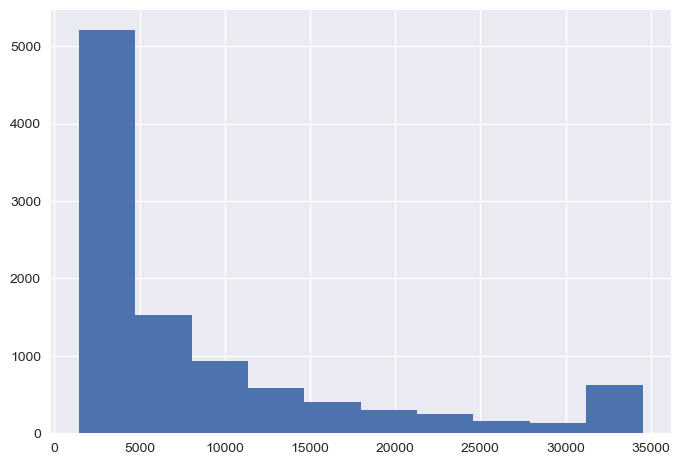

In [102]:
mean = reduced_data["Credit Limit"].mean()
median = reduced_data["Credit Limit"].median()
mode = st.mode(reduced_data["Credit Limit"])
print(mean, median, mode)
#mean > median --> right skewed distribtion 
#looking at the distribution of "Credit Limit"
plt.hist(reduced_data["Credit Limit"])
